In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from tqdm import tqdm
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Hindi to English LSTM/hindi_english_parallel.csv")
df.tail(20)

,hindi,english
1561821,"आप शीघ्र ही विधिक पेशे के कॉरपोरेट विधि,न्यायि...",You would soon join different branches of the ...
1561822,Y = धारा 143 की उपधारा (1) के खंड (क) के अधीन ...,Y = the amount of tax calculated on the total ...
1561823,"(म) ""वास्तविक और प्रथम आविष्कर्ता"" के अंतर्गत ...","(y) ""true and first inventor"" does not include..."
1561824,जाकिर साहब यह मानते थे कि जामिया बिरादरी के जह...,Zakir saheb conceded that this objective was s...
1561825,"(यक) ""विशेष आर्थिक जोन"" से धारा 3 की उपधारा (4...","(za) ""Special Economic Zone"" means each Specia..."
1561826,"(यग) ""यूनिट"" से किसी विशेष आर्थिक जोन में किसी...","(zc) ""Unit"" means a Unit set up by an entrepre..."
1561827,"(यछ) ""प्रतिभूति रसीद"" से कोर्इ रसीद या अन्य प्...","(zg) ""security receipt"" means a receipt or oth..."
1561828,जोनलः रू. 0.50 लाख के प्रत्येक वार्षिक पुरस्का...,Zonal: Eleven annual awards of ₹ 0.50 lakh eac...
1561829,इस्लाम से पहले करोड़ों लोगों के इस पारसी धर्म ...,"Zoroastrianism, which was once the religion of..."
1561830,"(य) ""प्रतिभूतिकरण"" से किसी प्रतिभूतिकरण कंपनी ...","(z) ""securitisation"" means acquisition of fina..."


In [3]:
print(df.isna().sum())
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df.shape

hindi      6057
english     877
dtype: int64


(1555574, 2)

In [4]:
def make_lowercase(data,column):
    data[column] = data[column].apply( lambda text: text.lower() )
    return data
df = make_lowercase(df,column="english")

In [5]:
df.tail(20)

,hindi,english
1555554,आप मानेंगे कि इस तरह मुद्दे पर चर्चा करने से स...,you would recognize that by posing the issue o...
1555555,"आप शीघ्र ही विधिक पेशे के कॉरपोरेट विधि,न्यायि...",you would soon join different branches of the ...
1555556,Y = धारा 143 की उपधारा (1) के खंड (क) के अधीन ...,y = the amount of tax calculated on the total ...
1555557,"(म) ""वास्तविक और प्रथम आविष्कर्ता"" के अंतर्गत ...","(y) ""true and first inventor"" does not include..."
1555558,जाकिर साहब यह मानते थे कि जामिया बिरादरी के जह...,zakir saheb conceded that this objective was s...
1555559,"(यक) ""विशेष आर्थिक जोन"" से धारा 3 की उपधारा (4...","(za) ""special economic zone"" means each specia..."
1555560,"(यग) ""यूनिट"" से किसी विशेष आर्थिक जोन में किसी...","(zc) ""unit"" means a unit set up by an entrepre..."
1555561,"(यछ) ""प्रतिभूति रसीद"" से कोर्इ रसीद या अन्य प्...","(zg) ""security receipt"" means a receipt or oth..."
1555562,जोनलः रू. 0.50 लाख के प्रत्येक वार्षिक पुरस्का...,zonal: eleven annual awards of ₹ 0.50 lakh eac...
1555563,इस्लाम से पहले करोड़ों लोगों के इस पारसी धर्म ...,"zoroastrianism, which was once the religion of..."


In [6]:
def remove_puntuations(data,column):
    special_char = set(string.punctuation+'।') 
    data[column] = data[column].apply(lambda line: ''.join(word for word in line if word not in special_char))
    data[column] = data[column].apply(lambda line: re.sub("'", '', line))
    return data
def remove_float(data, column):
    data[column] = data[column].apply(lambda line: re.sub(r'[+-]?[0-9]+\.[0-9]+', '', line))
    return data

df = remove_puntuations(df,column='english')
df = remove_puntuations(df,column='hindi')
df = remove_float(df, column='english')

In [7]:
df.tail(20)

,hindi,english
1555554,आप मानेंगे कि इस तरह मुद्दे पर चर्चा करने से स...,you would recognize that by posing the issue o...
1555555,आप शीघ्र ही विधिक पेशे के कॉरपोरेट विधिन्यायिक...,you would soon join different branches of the ...
1555556,Y धारा 143 की उपधारा 1 के खंड क के अधीन अवधार...,y the amount of tax calculated on the total i...
1555557,म वास्तविक और प्रथम आविष्कर्ता के अंतर्गत न तो...,y true and first inventor does not include eit...
1555558,जाकिर साहब यह मानते थे कि जामिया बिरादरी के जह...,zakir saheb conceded that this objective was s...
1555559,यक विशेष आर्थिक जोन से धारा 3 की उपधारा 4 के प...,za special economic zone means each special ec...
1555560,यग यूनिट से किसी विशेष आर्थिक जोन में किसी उद्...,zc unit means a unit set up by an entrepreneur...
1555561,यछ प्रतिभूति रसीद से कोर्इ रसीद या अन्य प्रतिभ...,zg security receipt means a receipt or other s...
1555562,जोनलः रू 050 लाख के प्रत्येक वार्षिक पुरस्कार ...,zonal eleven annual awards of ₹ 050 lakh each ...
1555563,इस्लाम से पहले करोड़ों लोगों के इस पारसी धर्म ...,zoroastrianism which was once the religion of ...


In [9]:
index_to_drop = []
for i in tqdm(list(df.index)):
    eng_text = df['english'][i].split()
    hin_text = df['hindi'][i].split()
#     count_of_float = sum([not(re.search('[-+]?\d*\.\d+|\d+', word)) == None for word in eng_text])
    count_of_hindi = sum([re.search('[a-zA-Z0-9]', word) == None for word in eng_text])
    count_of_alphabets = sum([not(re.search('[a-zA-Z]', word)) == None for word in hin_text])
    if count_of_hindi >= 1 or count_of_alphabets >= 2:
        index_to_drop.append(i)
df.drop(index=index_to_drop, inplace=True)
df.tail(20)

100%|███████████████████████████████████████████████████████████████████████████| 1555574/1555574 [00:42<00:00, 36784.37it/s]


,hindi,english
1555545,आप गीता के अध्ययन की अपेक्षा फुटबाल खेल कर स्व...,you will be nearer to heaven through football ...
1555547,आपको अपनी शिक्षा तभी उपयोगी लगेगी जब आप स्वयं ...,you will find your education useful only if yo...
1555548,आप अपनी जीवनवृत्ति में अनेक पेशेवर उपलब्धियां ...,you will have many professional accomplishment...
1555549,आप ज्ञान के अस्त्र तथा चरित्र की शक्ति के साथ ...,you will leave the hallowed precincts of this ...
1555550,आप मेरी सरकार पोर्टल के किसी भी हिस्से का गैरल...,you will not copy modify reproduce republish d...
1555551,आपको ऐसा पेड़ और कहीं नहीं दिखेगा यह राजस्थान ...,you will not find that tree elsewhere it is en...
1555552,प्रदाता की पूर्व लिखित अनुमति के बिना आप नजर र...,you will not use any robot spider other automa...
1555553,आप भारत की एकता और विविधता का सार्थक प्रतीक बन...,you will symbolise the unity and diversity of ...
1555554,आप मानेंगे कि इस तरह मुद्दे पर चर्चा करने से स...,you would recognize that by posing the issue o...
1555555,आप शीघ्र ही विधिक पेशे के कॉरपोरेट विधिन्यायिक...,you would soon join different branches of the ...


In [10]:
df['eng_length'] = df['english'].apply( lambda text: len(text.split()))
df['hin_length'] = df['hindi'].apply( lambda text: len(text.split()))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484303 entries, 0 to 1555566
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   hindi       1484303 non-null  object
 1   english     1484303 non-null  object
 2   eng_length  1484303 non-null  int64 
 3   hin_length  1484303 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 56.6+ MB


In [12]:
df.drop(index=df[df['hin_length'] == 0].index, inplace=True)
df.drop(index=df[df['eng_length'] == 0].index, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484021 entries, 0 to 1555566
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   hindi       1484021 non-null  object
 1   english     1484021 non-null  object
 2   eng_length  1484021 non-null  int64 
 3   hin_length  1484021 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 56.6+ MB


In [14]:
# dataset.to_csv('hindienglish.csv', index=False)
# import os
# current_directory = os.getcwd() 

<Axes: xlabel='eng_length', ylabel='Percent'>

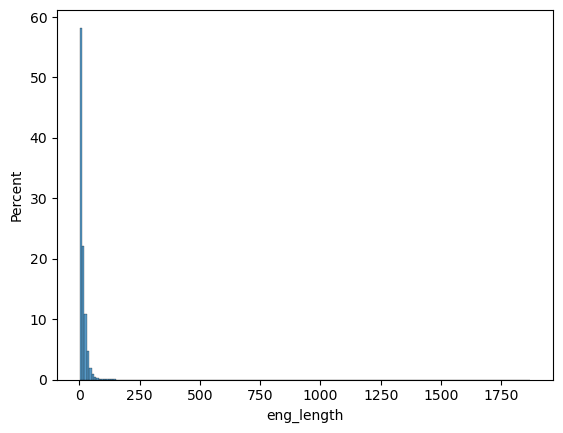

In [15]:
sns.histplot(data=df, x="eng_length", binwidth=10, stat="percent")

<Axes: xlabel='hin_length', ylabel='Percent'>

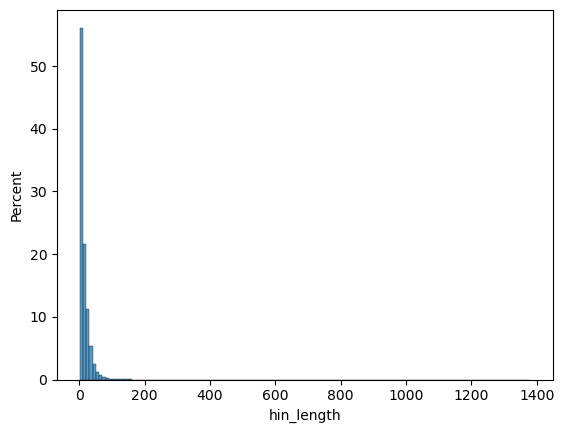

In [16]:
sns.histplot(data=df, x="hin_length", binwidth=10, stat="percent")

In [17]:
maximum_length_of_sentence = 15
print('Count of Large Length Hindi Sentences : ',sum(df['hin_length'] > maximum_length_of_sentence))
print('Percentage of High Length Hindi Sentences : ',sum(df['hin_length'] > maximum_length_of_sentence)/df.shape[0])
print("-----------------------------")
print('Count of Large Length English Sentences : ',sum(df['eng_length'] > maximum_length_of_sentence))
print('Percentage of High Length English Sentences : ',sum(df['eng_length'] > maximum_length_of_sentence)/df.shape[0])

Count of Large Length Hindi Sentences :  463747
Percentage of High Length Hindi Sentences :  0.31249355635803
-----------------------------
Count of Large Length English Sentences :  426305
Percentage of High Length English Sentences :  0.28726345516673957


In [18]:
df.drop(index=df[df['hin_length'] > maximum_length_of_sentence].index, inplace=True)
df.drop(index=df[df['eng_length'] > maximum_length_of_sentence].index, inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(990165, 4)

<Axes: xlabel='eng_length', ylabel='Percent'>

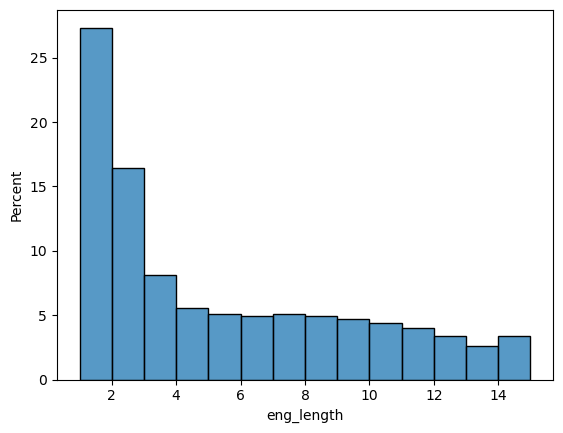

In [19]:
sns.histplot(data=df, x="eng_length",binwidth=1,stat="percent")

<Axes: xlabel='hin_length', ylabel='Percent'>

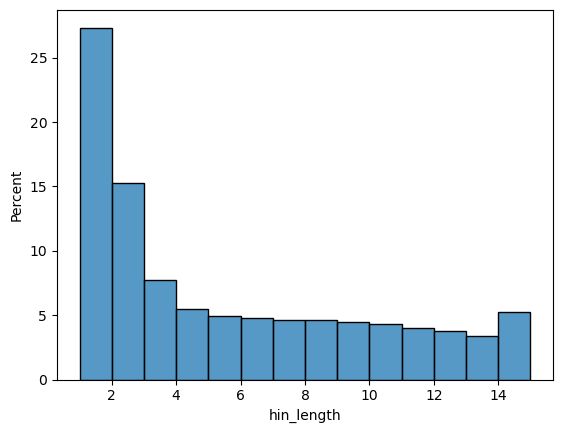

In [20]:
sns.histplot(data=df, x="hin_length",binwidth=1,stat="percent")

In [21]:
df.iloc[300:310]

,hindi,english,eng_length,hin_length
300,अंतर्क्रियात्मक s कार्रवाई करने योग्य नहीं है,interactive s is not actionable,5,7
301,एक से अधिक विडजेट फोकस में है,more than one focused widget,5,7
302,s का कोई पाठ अंतराफलक नहीं है,s has no text interface,5,7
303,अभिभावक में s सूची शिशु सूची सेमेल नहीं खाती,s index in parent does not match child index,9,9
304,s संबंध के लिए अन्योन्य गायब है,missing reciprocal for s relation,5,7
305,s गायब नाम या सूचक,s missing name or label,5,5
306,s किसी समुच्चय का सदस्य नहीं है,s does not belong to a set,7,7
307,s का कोई नाम या विवरण नहीं,s has no name or description,6,7
308,पसंद P,preferences,1,2
309,विषय सूची C,contents,1,3


In [22]:
dataset=df.drop(columns=['eng_length', 'hin_length'])

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990165 entries, 0 to 990164
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   hindi    990165 non-null  object
 1   english  990165 non-null  object
dtypes: object(2)
memory usage: 15.1+ MB


In [24]:
dataset.to_csv("preprocessed_hindi_to_english_dataset_maxlen15.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990165 entries, 0 to 990164
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   hindi       990165 non-null  object
 1   english     990165 non-null  object
 2   eng_length  990165 non-null  int64 
 3   hin_length  990165 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 30.2+ MB
